In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
data = pd.read_excel('C:/Users/91703/OneDrive/Desktop/marketing  document.csv.xlsx')



In [3]:
def preprocess_text():
    data['cleaned_text'] = data['Column1'].apply(preprocess_text)


In [4]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(data['Column1'])

In [5]:
num_topics = 5  # Number of topics to identify (you can adjust this)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [6]:
def get_top_words(model, feature_names, n_words=10):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words.append([feature_names[i] for i in top_words_idx])
    return top_words


In [7]:
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names)

In [8]:
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

Topic 1: patterns health collaboration investigative medical predictive public advanced detecting fraudsters
Topic 2: detecting collaboration investigative predictive medical public health patterns advanced fraudsters
Topic 3: advanced public predictive medical collaboration investigative health patterns fraudsters detecting
Topic 4: fraudsters medical predictive collaboration investigative health patterns public advanced detecting
Topic 5: investigative collaboration predictive medical health patterns public advanced detecting fraudsters


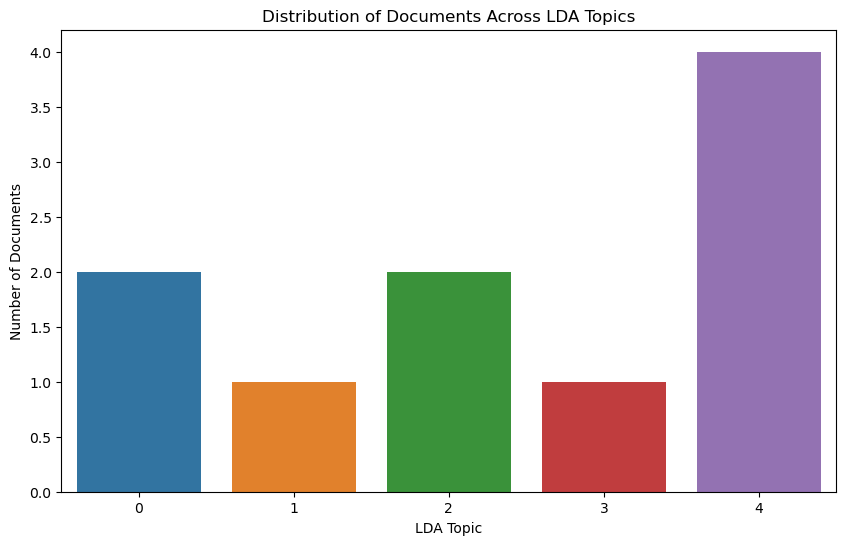

Topic 1: patterns health collaboration investigative medical predictive public advanced detecting fraudsters
Topic 2: detecting collaboration investigative predictive medical public health patterns advanced fraudsters
Topic 3: advanced public predictive medical collaboration investigative health patterns fraudsters detecting
Topic 4: fraudsters medical predictive collaboration investigative health patterns public advanced detecting
Topic 5: investigative collaboration predictive medical health patterns public advanced detecting fraudsters


In [9]:
# Get the topic distribution for each document
lda_topic_distribution = lda.transform(dtm)

# Assign the most probable topic to each document
data['lda_topic'] = lda_topic_distribution.argmax(axis=1)

# Visualize the distribution of documents across topics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='lda_topic')
plt.title("Distribution of Documents Across LDA Topics")
plt.xlabel("LDA Topic")
plt.ylabel("Number of Documents")
plt.show()

# Explore the topics and check for patterns
for topic_idx, words in enumerate(top_words):
    print(f"Topic {topic_idx + 1}: {' '.join(words)}")
    topic_docs = data[data['lda_topic'] == topic_idx]['Column1']